# Adult comparison

Comparing the results on the Attacks on Adult using the `Hard Voting Classifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../"
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Adult data

In [3]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore
DATASET = "adult"
assert DATASET == "adult" # to avoid problems when duplicating the notebook
BB = load_adult_randomforest()
BB_DATA = load_adult_data("adult-blackbox-data2.npz")

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



In the following experiments:
* Data: indicates the data used to create the Explainer.
* Attack: indicates the data used to create the Shadow Models.
* Explainer: The Explainer used (Either the Lime Regressor or the Decision Tree).
* Filter: if true the *Data* have been filtered using mean + 3std.
* Instances Selection: 3-elems per quantile or distance-based approach

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [4]:
PATH = Path('../../decision_tree/decision_tree_dataset_no3std/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.92      0.79     24558
         out       0.31      0.09      0.14     10526

    accuracy                           0.67     35084
   macro avg       0.51      0.50      0.47     35084
weighted avg       0.58      0.67      0.60     35084


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20131
         out       0.30      0.03      0.05      8665

    accuracy                           0.69     28796
   macro avg       0.50      0.50      0.43     28796
weighted avg       0.58      0.69      0.58     28796


Class 1
              precision    recall  f1-score   support

          in       0.71      0.65      0.68      4427
         out       0.31      0.38      0.34      1861

    accuracy                           0.57      6288
   macro avg       0.51      0.51      0.51      6288
weighted avg       0.60      0.57      0.58 

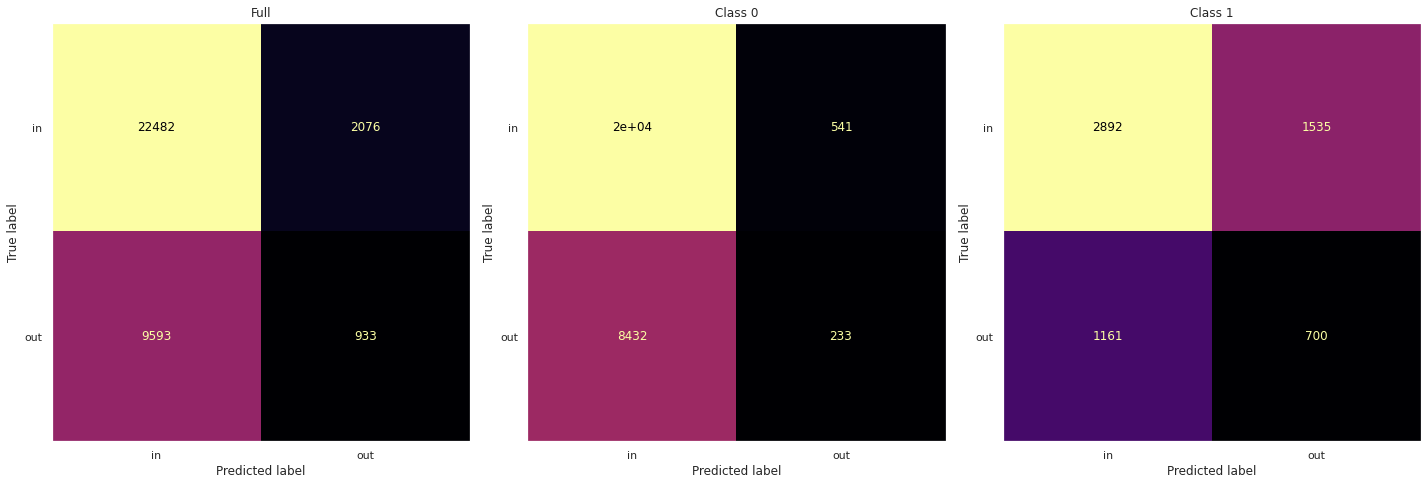

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [6]:
PATH = Path(f"../../decision_tree/decision_tree_dataset/adult/experiment_output")
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.15      0.25     24686
         out       0.30      0.85      0.44     10577

    accuracy                           0.36     35263
   macro avg       0.50      0.50      0.34     35263
weighted avg       0.58      0.36      0.31     35263


Class 0
              precision    recall  f1-score   support

          in       0.69      0.11      0.19     19956
         out       0.30      0.89      0.45      8607

    accuracy                           0.34     28563
   macro avg       0.50      0.50      0.32     28563
weighted avg       0.57      0.34      0.27     28563


Class 1
              precision    recall  f1-score   support

          in       0.71      0.33      0.45      4730
         out       0.30      0.68      0.41      1970

    accuracy                           0.43      6700
   macro avg       0.50      0.50      0.43      6700
weighted avg       0.59      0.43      0.44 

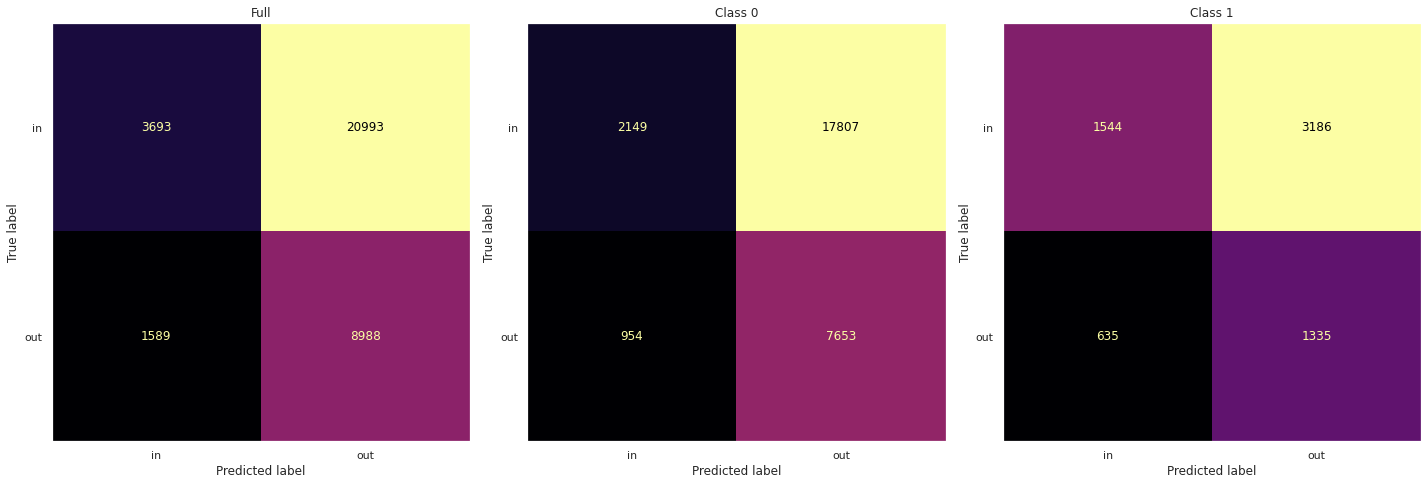

In [7]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `False` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [8]:
PATH = Path('../../standard_lime/lime_generated/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     25250
         out       0.30      0.01      0.02     10821

    accuracy                           0.69     36071
   macro avg       0.50      0.50      0.42     36071
weighted avg       0.58      0.69      0.58     36071


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     20349
         out       0.34      0.01      0.02      8765

    accuracy                           0.70     29114
   macro avg       0.52      0.50      0.42     29114
weighted avg       0.59      0.70      0.58     29114


Class 1
              precision    recall  f1-score   support

          in       0.70      0.96      0.81      4901
         out       0.27      0.04      0.06      2056

    accuracy                           0.69      6957
   macro avg       0.49      0.50      0.44      6957
weighted avg       0.57      0.69      0.59 

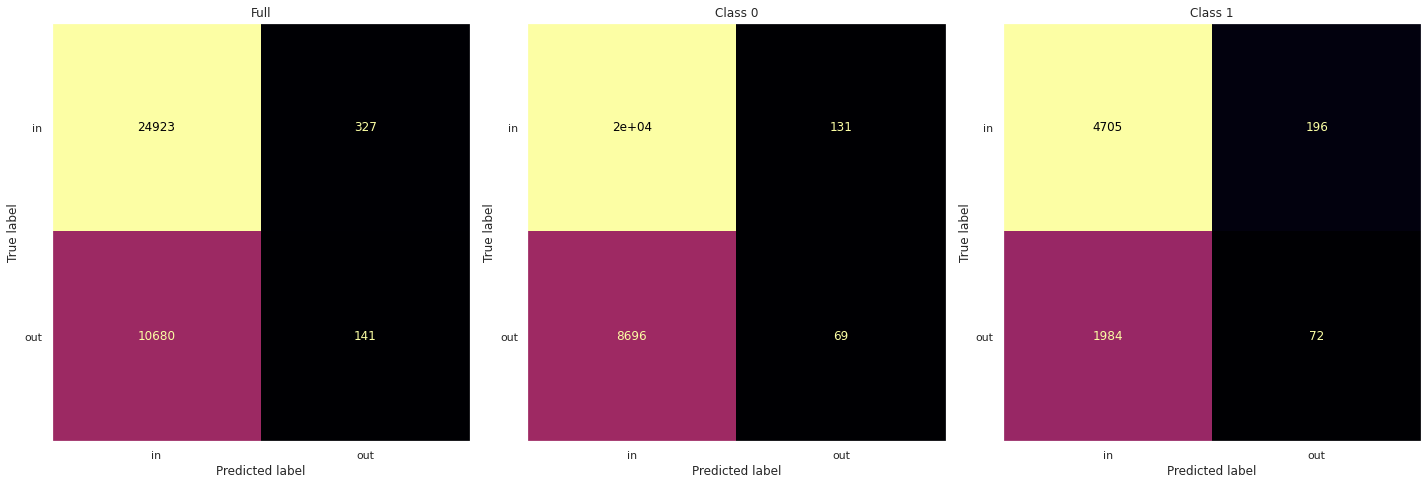

In [9]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `True` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [10]:
PATH = Path('../../standard_lime/lime_generated_filter/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     25289
         out       0.31      0.01      0.02     10835

    accuracy                           0.70     36124
   macro avg       0.51      0.50      0.42     36124
weighted avg       0.58      0.70      0.58     36124


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     20352
         out       0.33      0.01      0.02      8765

    accuracy                           0.70     29117
   macro avg       0.52      0.50      0.42     29117
weighted avg       0.59      0.70      0.58     29117


Class 1
              precision    recall  f1-score   support

          in       0.70      0.97      0.82      4937
         out       0.29      0.03      0.05      2070

    accuracy                           0.69      7007
   macro avg       0.50      0.50      0.44      7007
weighted avg       0.58      0.69      0.59 

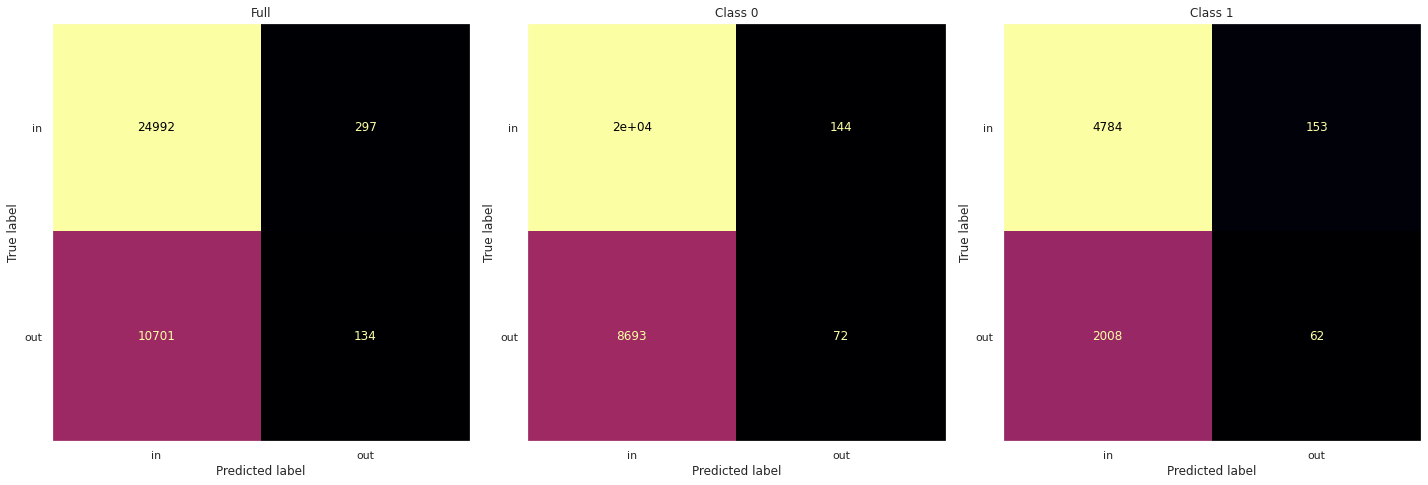

In [11]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [12]:
PATH = Path('../../decision_tree/statistical_no3std/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.09      0.16     24982
         out       0.30      0.91      0.45     10680

    accuracy                           0.33     35662
   macro avg       0.50      0.50      0.30     35662
weighted avg       0.58      0.33      0.25     35662


Class 0
              precision    recall  f1-score   support

          in       0.69      0.05      0.10     20165
         out       0.30      0.94      0.46      8663

    accuracy                           0.32     28828
   macro avg       0.50      0.50      0.28     28828
weighted avg       0.57      0.32      0.21     28828


Class 1
              precision    recall  f1-score   support

          in       0.70      0.23      0.35      4817
         out       0.29      0.77      0.43      2017

    accuracy                           0.39      6834
   macro avg       0.50      0.50      0.39      6834
weighted avg       0.58      0.39      0.37 

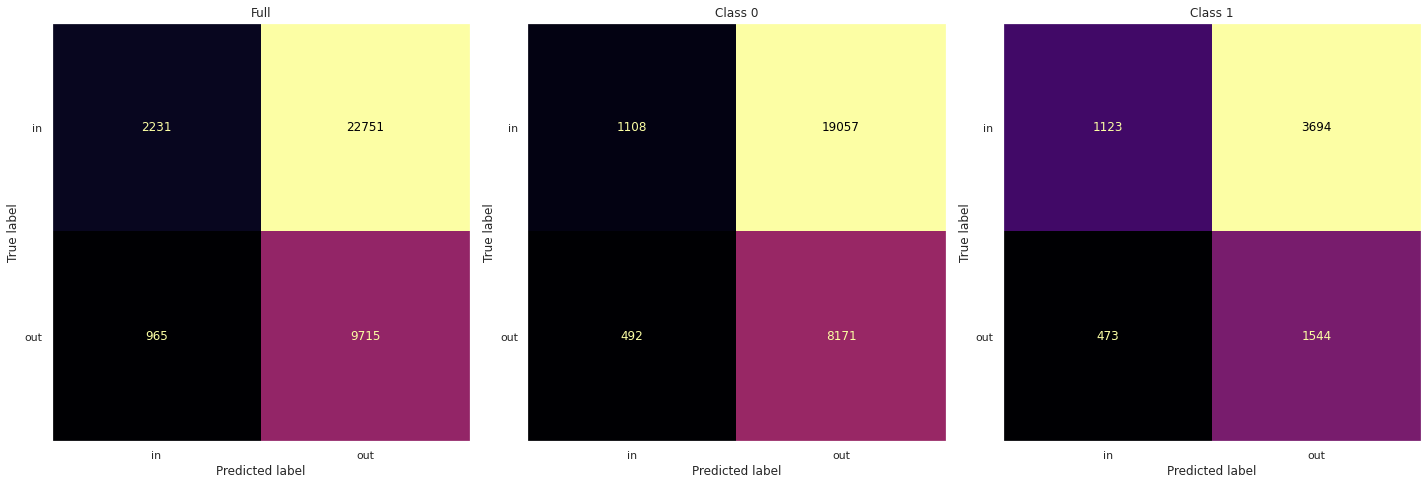

In [13]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [14]:
PATH = Path('../../decision_tree/statistical/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     24722
         out       0.31      0.06      0.11     10576

    accuracy                           0.68     35298
   macro avg       0.50      0.50      0.45     35298
weighted avg       0.58      0.68      0.59     35298


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     19967
         out       0.31      0.06      0.10      8587

    accuracy                           0.68     28554
   macro avg       0.50      0.50      0.45     28554
weighted avg       0.58      0.68      0.59     28554


Class 1
              precision    recall  f1-score   support

          in       0.71      0.92      0.80      4755
         out       0.31      0.08      0.13      1989

    accuracy                           0.67      6744
   macro avg       0.51      0.50      0.47      6744
weighted avg       0.59      0.67      0.60 

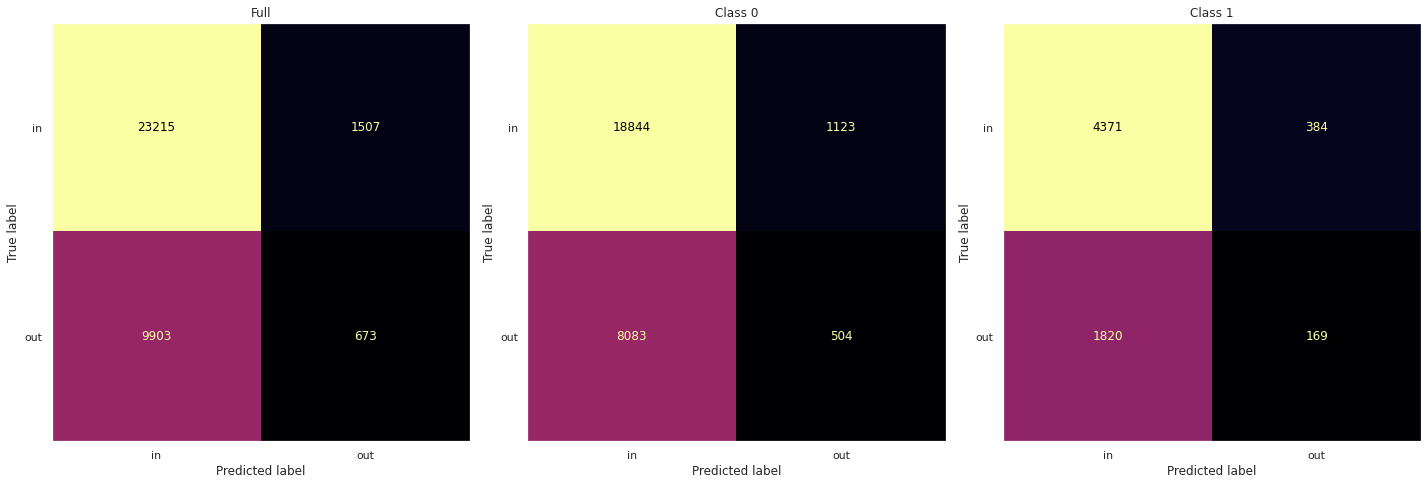

In [15]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [16]:
PATH = Path('../../decision_tree/statistical_noisy/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.24      0.35     24656
         out       0.30      0.77      0.43     10570

    accuracy                           0.40     35226
   macro avg       0.50      0.50      0.39     35226
weighted avg       0.58      0.40      0.38     35226


Class 0
              precision    recall  f1-score   support

          in       0.70      0.05      0.10     19801
         out       0.30      0.95      0.46      8532

    accuracy                           0.32     28333
   macro avg       0.50      0.50      0.28     28333
weighted avg       0.58      0.32      0.21     28333


Class 1
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      4855
         out       0.32      0.02      0.04      2038

    accuracy                           0.70      6893
   macro avg       0.51      0.50      0.43      6893
weighted avg       0.59      0.70      0.59 

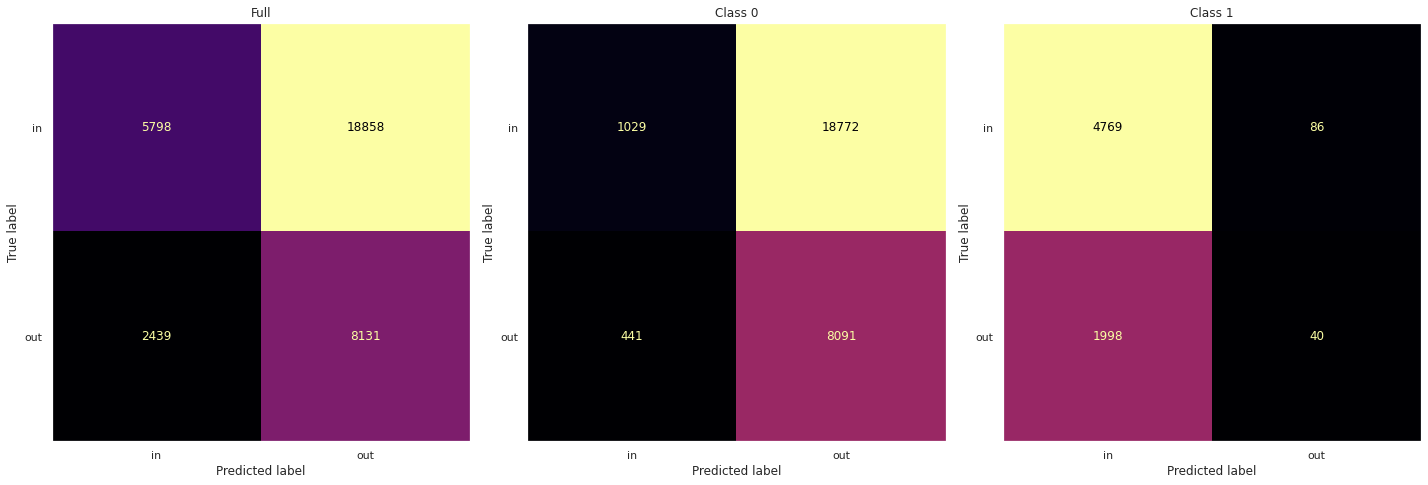

In [17]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [18]:
PATH = Path('../../decision_tree/statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.31      0.43     24376
         out       0.30      0.69      0.42     10459

    accuracy                           0.42     34835
   macro avg       0.50      0.50      0.42     34835
weighted avg       0.58      0.42      0.42     34835


Class 0
              precision    recall  f1-score   support

          in       0.69      0.13      0.22     19422
         out       0.30      0.86      0.45      8379

    accuracy                           0.35     27801
   macro avg       0.50      0.50      0.33     27801
weighted avg       0.57      0.35      0.29     27801


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4954
         out       0.33      0.01      0.01      2080

    accuracy                           0.70      7034
   macro avg       0.52      0.50      0.42      7034
weighted avg       0.59      0.70      0.58 

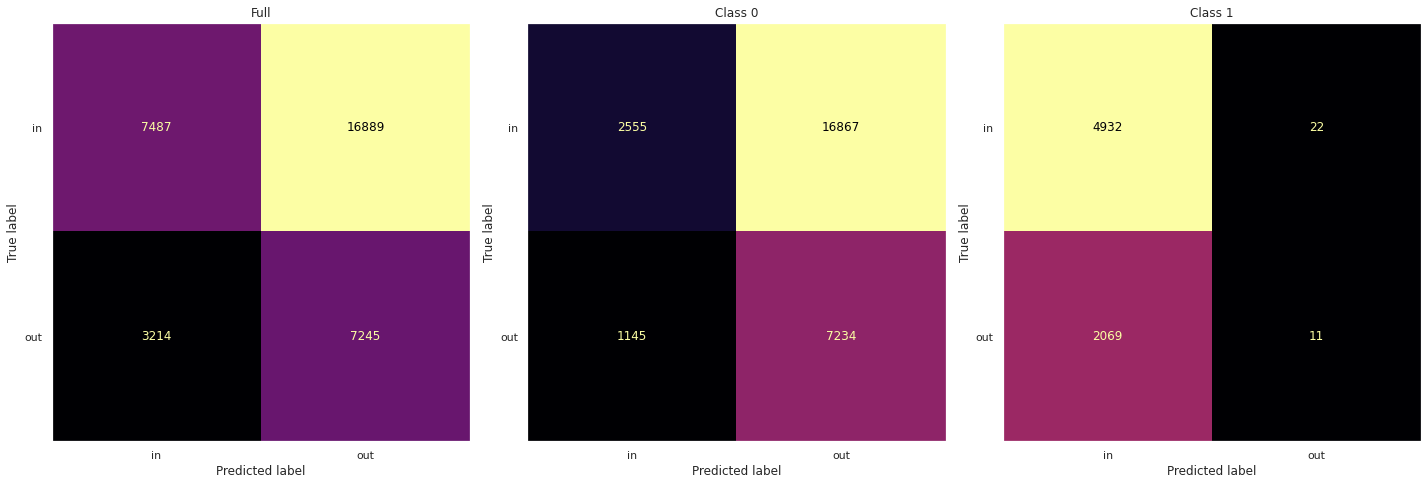

In [19]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [20]:
PATH = Path('../../decision_tree/trepan/noisy/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.21      0.33     25186
         out       0.30      0.79      0.44     10787

    accuracy                           0.39     35973
   macro avg       0.50      0.50      0.38     35973
weighted avg       0.58      0.39      0.36     35973


Class 0
              precision    recall  f1-score   support

          in       0.69      0.02      0.04     20231
         out       0.30      0.98      0.46      8706

    accuracy                           0.31     28937
   macro avg       0.49      0.50      0.25     28937
weighted avg       0.57      0.31      0.17     28937


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.33      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

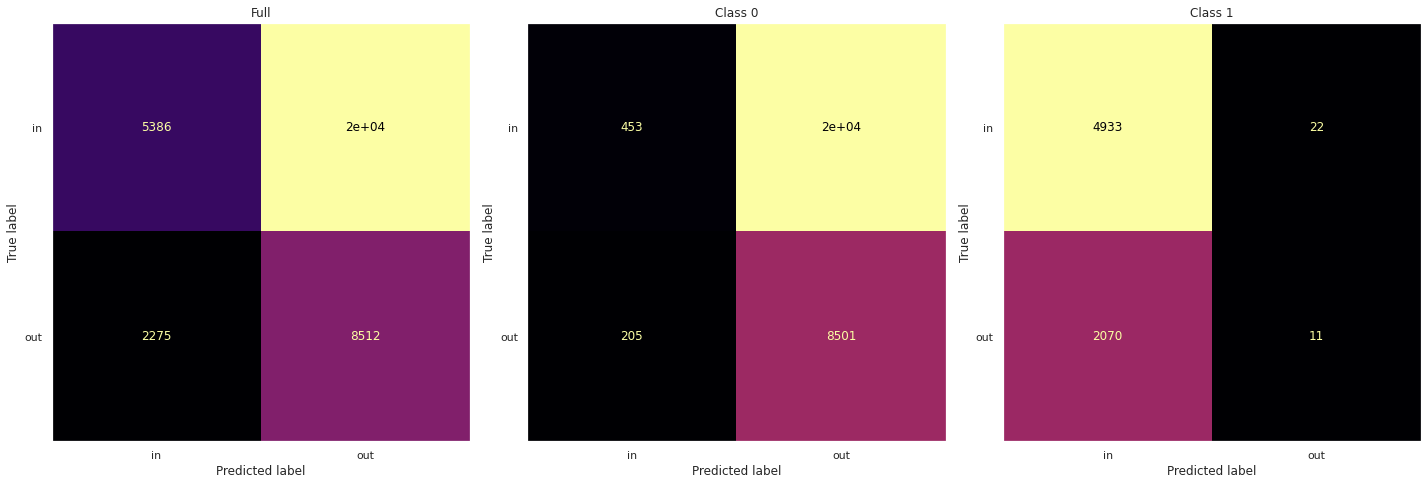

In [21]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [22]:
PATH = Path('../../decision_tree/trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.80      0.75      7654
         out       0.32      0.22      0.26      3320

    accuracy                           0.62     10974
   macro avg       0.51      0.51      0.50     10974
weighted avg       0.59      0.62      0.60     10974


Class 0
              precision    recall  f1-score   support

          in       0.69      0.43      0.53      2700
         out       0.32      0.58      0.41      1241

    accuracy                           0.48      3941
   macro avg       0.51      0.51      0.47      3941
weighted avg       0.57      0.48      0.49      3941


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4954
         out       0.28      0.00      0.01      2079

    accuracy                           0.70      7033
   macro avg       0.49      0.50      0.42      7033
weighted avg       0.58      0.70      0.58 

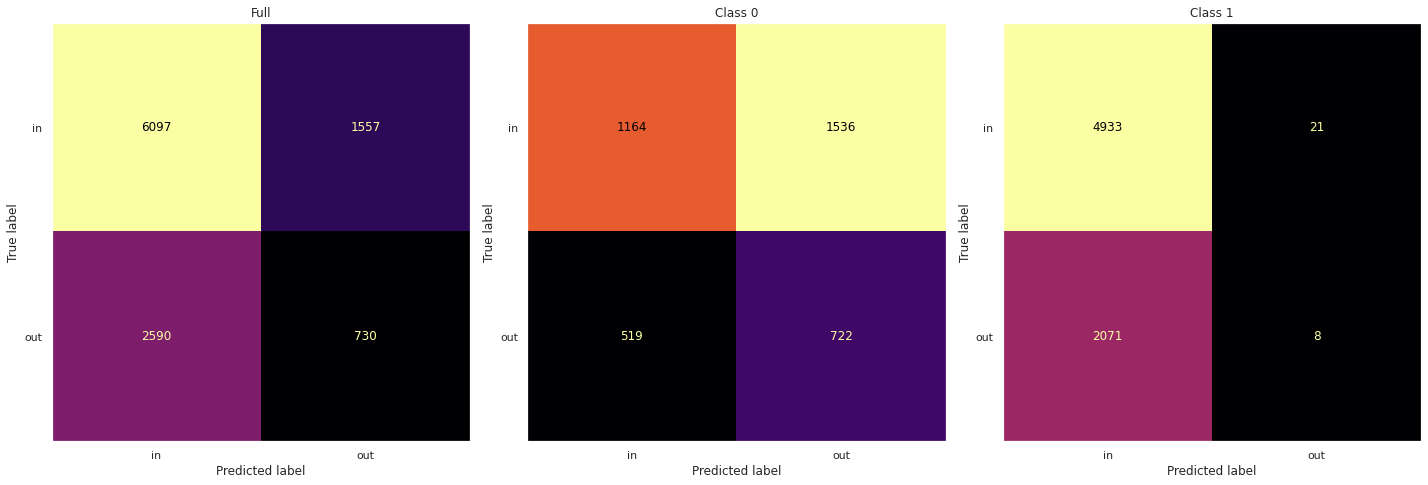

In [23]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [24]:
PATH = Path('../../decision_tree/trepan/statistical/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.83      0.76     24908
         out       0.30      0.17      0.21     10664

    accuracy                           0.63     35572
   macro avg       0.50      0.50      0.49     35572
weighted avg       0.58      0.63      0.60     35572


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     20014
         out       0.30      0.02      0.03      8606

    accuracy                           0.69     28620
   macro avg       0.50      0.50      0.43     28620
weighted avg       0.58      0.69      0.58     28620


Class 1
              precision    recall  f1-score   support

          in       0.71      0.20      0.32      4894
         out       0.30      0.80      0.43      2058

    accuracy                           0.38      6952
   macro avg       0.50      0.50      0.37      6952
weighted avg       0.58      0.38      0.35 

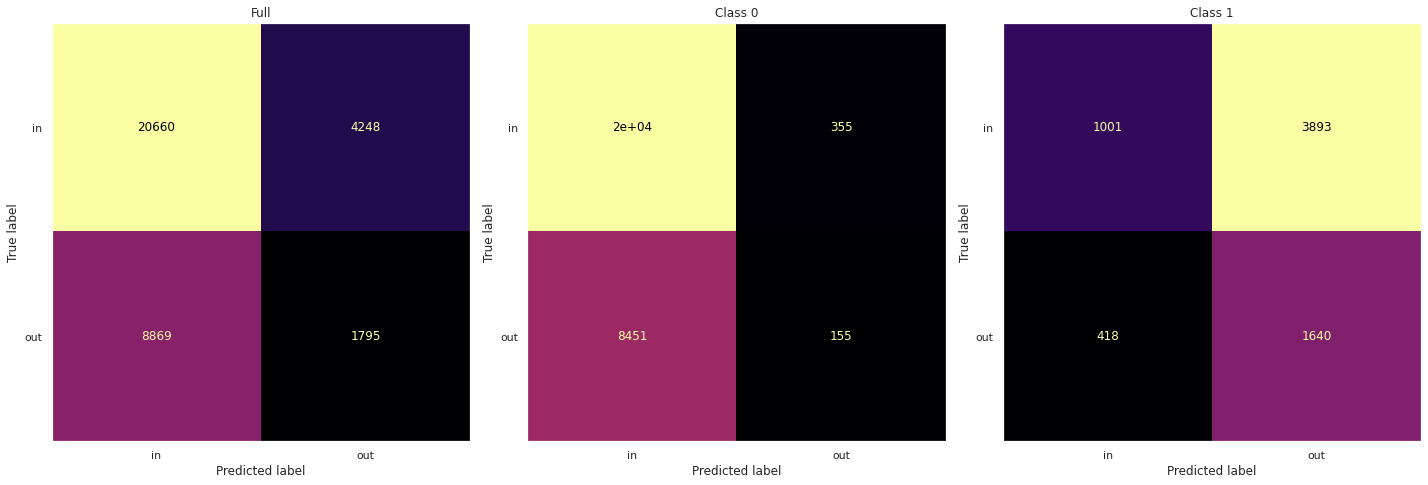

In [25]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [26]:
PATH = Path('../../decision_tree/trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.21      0.32     24618
         out       0.30      0.80      0.44     10538

    accuracy                           0.38     35156
   macro avg       0.50      0.50      0.38     35156
weighted avg       0.58      0.38      0.36     35156


Class 0
              precision    recall  f1-score   support

          in       0.68      0.05      0.08     20148
         out       0.30      0.95      0.46      8685

    accuracy                           0.32     28833
   macro avg       0.49      0.50      0.27     28833
weighted avg       0.57      0.32      0.20     28833


Class 1
              precision    recall  f1-score   support

          in       0.71      0.94      0.81      4470
         out       0.31      0.06      0.10      1853

    accuracy                           0.68      6323
   macro avg       0.51      0.50      0.46      6323
weighted avg       0.59      0.68      0.60 

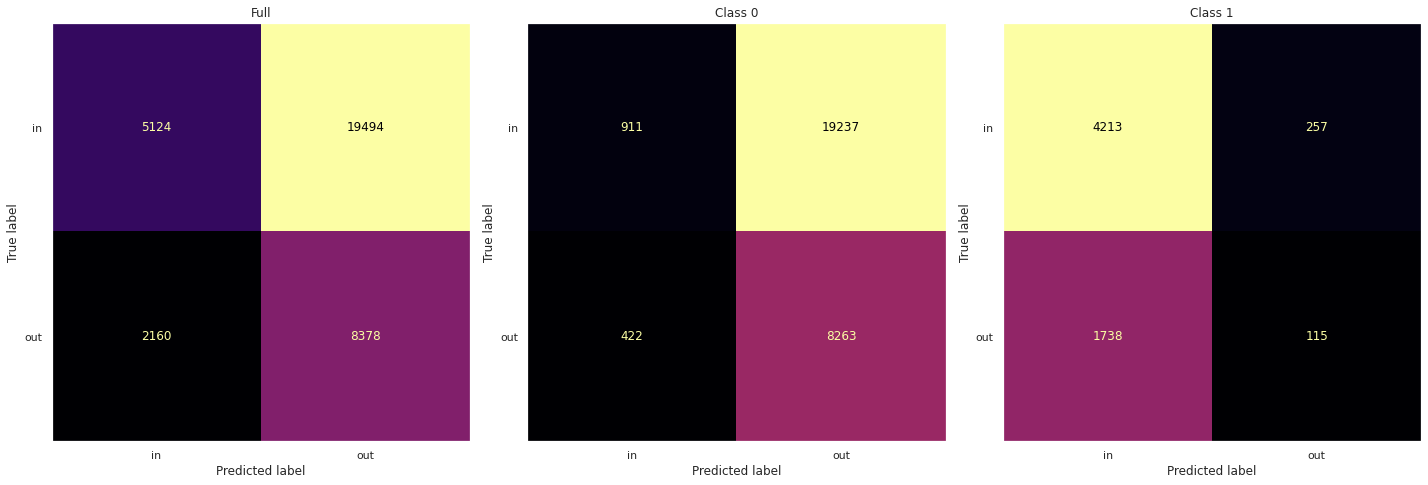

In [27]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [28]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_filtering_nobalanced/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.69      0.09      0.15     25037
         out       0.30      0.91      0.45     10713

    accuracy                           0.33     35750
   macro avg       0.50      0.50      0.30     35750
weighted avg       0.58      0.33      0.24     35750


Class 0
              precision    recall  f1-score   support

          in       0.67      0.03      0.06     20251
         out       0.30      0.97      0.46      8720

    accuracy                           0.31     28971
   macro avg       0.49      0.50      0.26     28971
weighted avg       0.56      0.31      0.18     28971


Class 1
              precision    recall  f1-score   support

          in       0.70      0.32      0.44      4786
         out       0.29      0.67      0.41      1993

    accuracy                           0.42      6779
   macro avg       0.50      0.50      0.42      6779
weighted avg       0.58      0.42      0.43 

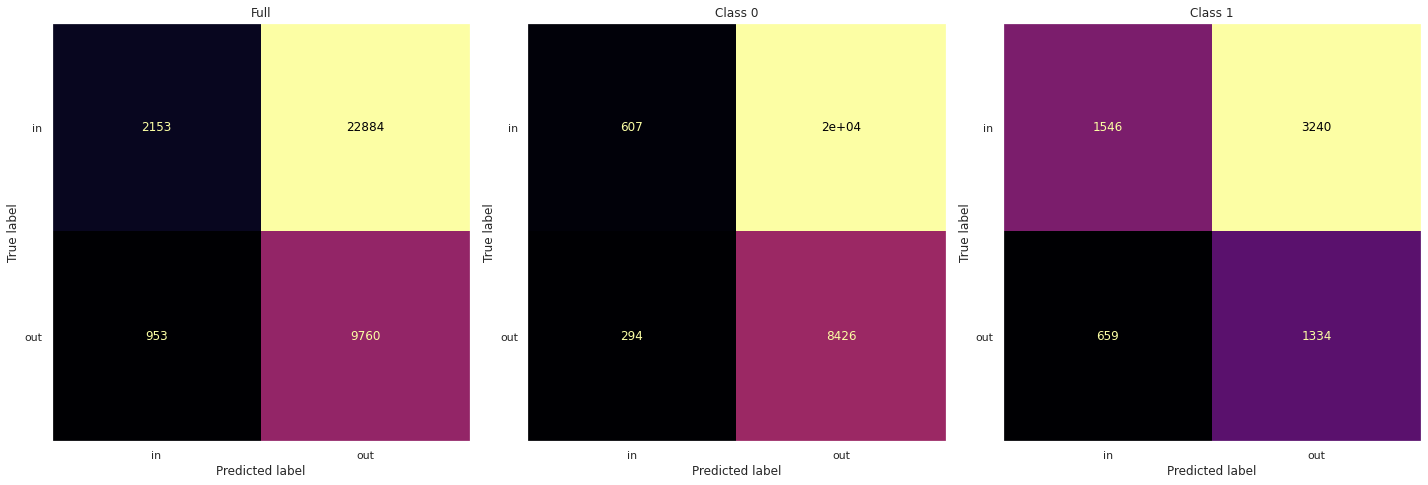

In [29]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [30]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_nobalanced/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     24585
         out       0.32      0.01      0.03     10540

    accuracy                           0.70     35125
   macro avg       0.51      0.50      0.42     35125
weighted avg       0.59      0.70      0.58     35125


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     19630
         out       0.32      0.02      0.03      8459

    accuracy                           0.69     28089
   macro avg       0.51      0.50      0.42     28089
weighted avg       0.59      0.69      0.58     28089


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.31      0.00      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.51      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

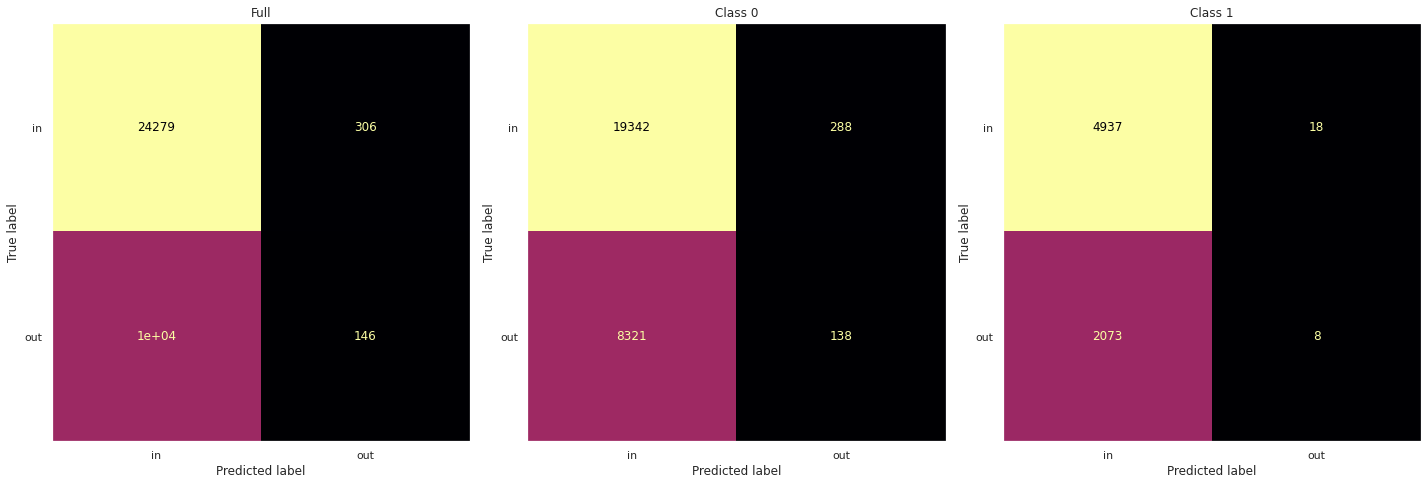

In [31]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Noisy` on `Black Box Train` Explainer: `Decision Tree`  Instances Selection: `Distance`

In [4]:
PATH = Path('../../decision_tree/CFS/adult/noisy/experiment_output')
assert PATH.exists()

In [5]:
from utils.dataloading.attack_models import load_attack_models

report full
              precision    recall  f1-score   support

          in       0.70      0.23      0.35     25173
         out       0.30      0.77      0.43     10793

    accuracy                           0.39     35966
   macro avg       0.50      0.50      0.39     35966
weighted avg       0.58      0.39      0.37     35966


Class 0
              precision    recall  f1-score   support

          in       0.68      0.04      0.08     20218
         out       0.30      0.95      0.46      8712

    accuracy                           0.32     28930
   macro avg       0.49      0.50      0.27     28930
weighted avg       0.57      0.32      0.19     28930


Class 1
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4955
         out       0.32      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.51      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

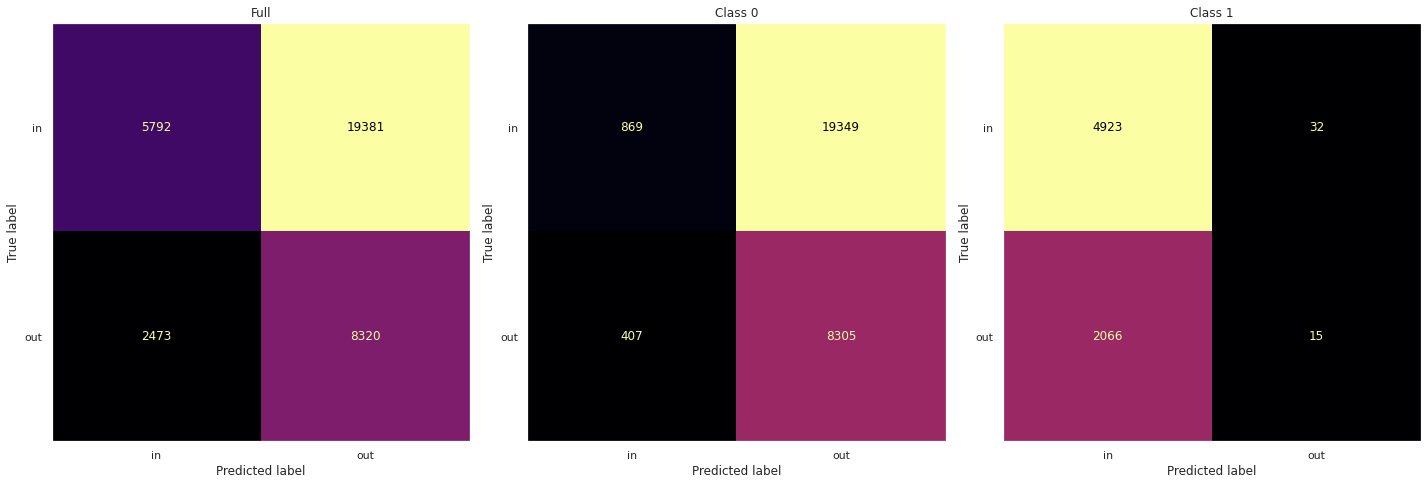

In [6]:
attack_0, attack_1, instances = load_attack_models(PATH, load_instances=False)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Instances Selection: `Distance`

In [7]:
PATH = Path('../../decision_tree/CFS/adult/statistical/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.87      0.77     24528
         out       0.29      0.13      0.18     10530

    accuracy                           0.64     35058
   macro avg       0.50      0.50      0.48     35058
weighted avg       0.58      0.64      0.59     35058


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     19731
         out       0.29      0.03      0.05      8510

    accuracy                           0.69     28241
   macro avg       0.49      0.50      0.43     28241
weighted avg       0.57      0.69      0.58     28241


Class 1
              precision    recall  f1-score   support

          in       0.70      0.43      0.53      4797
         out       0.29      0.57      0.39      2020

    accuracy                           0.47      6817
   macro avg       0.50      0.50      0.46      6817
weighted avg       0.58      0.47      0.49 

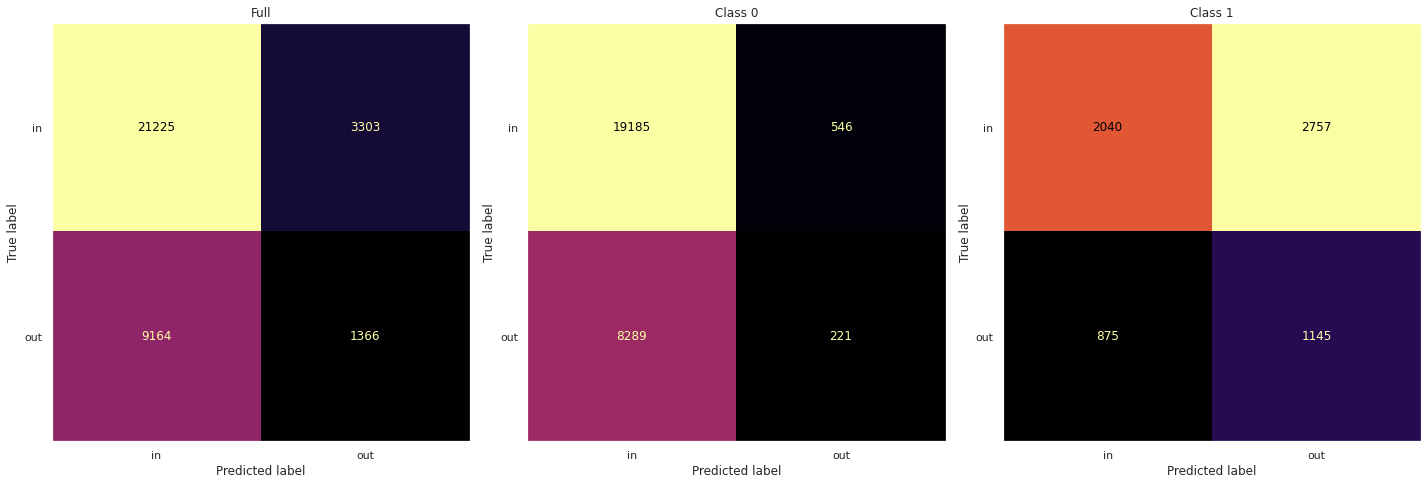

In [8]:
attack_0, attack_1, instances = load_attack_models(PATH, load_instances=False)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)